In [95]:
import os
import re
import pandas as pd
import sys
import glob
import traceback

%matplotlib inline

In [96]:
# Absolute or relative path to workshop data extracted from AMY
workshops_file = "data/raw/carpentry-workshops_GB_2018-10-23.csv"

In [97]:
workshops_df = pd.read_csv(workshops_file, encoding = "utf-8")

In [98]:
# How many workshops are there for each year?
workshops_per_year = workshops_df['year'].value_counts()
workshops_per_year.sort_index(ascending = True, inplace=True)
print(workshops_per_year)

2012     7
2013    14
2014    21
2015    30
2016    40
2017    47
2018    38
2019     1
Name: year, dtype: int64


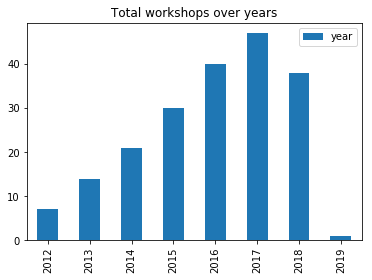

In [99]:
workshops_per_year.plot(kind='bar', legend=True, title ="Total workshops over years")

In [100]:
# How many workshops were held at each host insitution?
workshops_per_host = workshops_df['host_domain'].value_counts()
print(workshops_per_host)

ucl.ac.uk                          24
imperial.ac.uk                     16
manchester.ac.uk                   15
leeds.ac.uk                        15
ed.ac.uk                           14
ox.ac.uk                           11
southampton.ac.uk                  10
cam.ac.uk                           8
software-carpentry.org              6
st-andrews.ac.uk                    5
earlham.ac.uk                       5
bristol.ac.uk                       4
anthro.ox.ac.uk                     4
regenmedcdt.manchester.ac.uk        3
aber.ac.uk                          3
shef.ac.uk                          3
dundee.ac.uk                        3
epcc.ed.ac.uk                       3
tgac.ac.uk                          3
rhul.ac.uk                          2
nottingham.ac.uk                    2
cmist.manchester.ac.uk              2
crick.ac.uk                         2
nhm.ac.uk                           2
qub.ac.uk                           2
software.ac.uk                      2
gla.ac.uk   

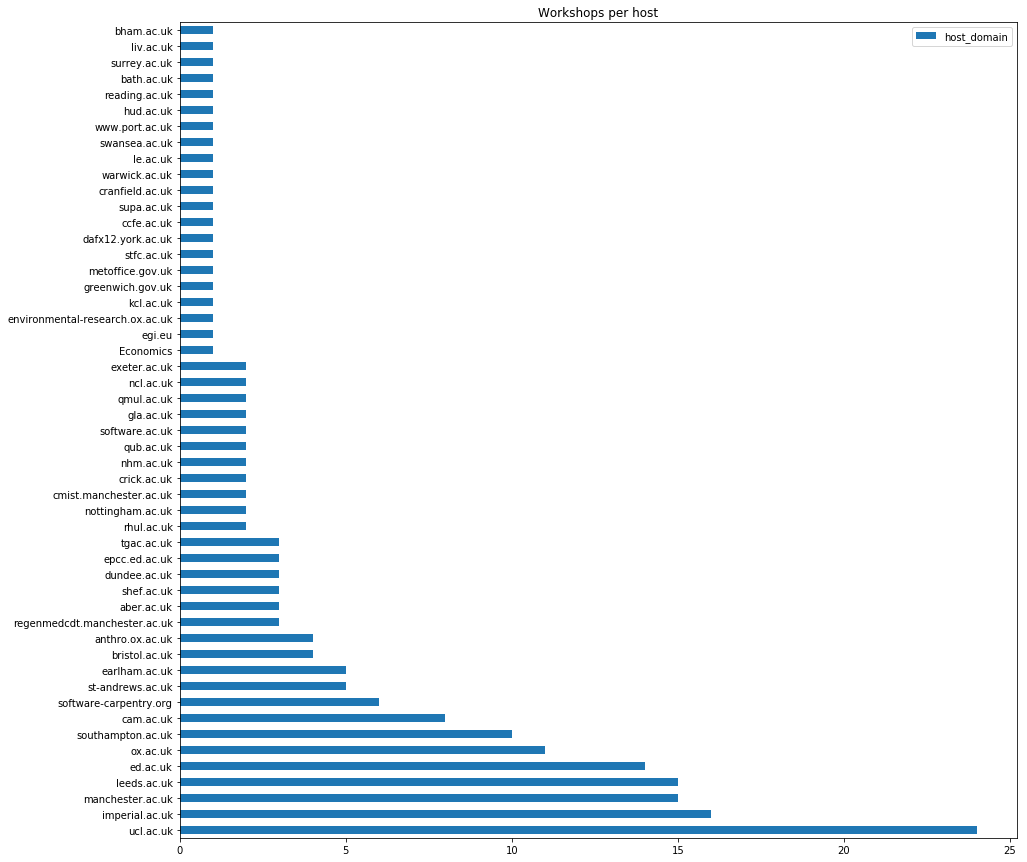

In [101]:
workshops_per_host.plot(kind='barh', legend=True, title ="Workshops per host", figsize = (15,15))

In [102]:
# How many SWC, DC, LC, TTT workshops were held so far?
workshop_types = workshops_df['workshop_type'].value_counts()
print(workshop_types)

SWC    157
DC      27
TTT     12
LC       2
Name: workshop_type, dtype: int64


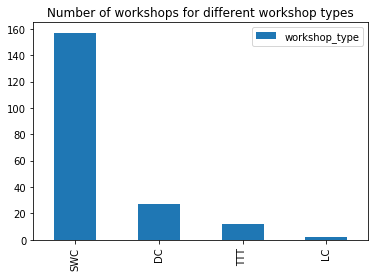

In [103]:
workshop_types.plot(kind='bar', legend=True, title ="Number of workshops for different workshop types")

workshop_type  DC  LC  SWC  TTT
year                           
2012            0   0    7    0
2013            0   0   14    0
2014            0   0   21    0
2015            2   0   25    3
2016            7   0   30    3
2017           12   1   30    4
2018            6   1   29    2
2019            0   0    1    0


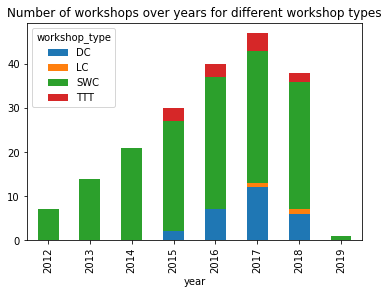

In [104]:
# How are number of different workshops (SWC, DC, LC, TTT) changing over years?
workshop_types_per_year = workshops_df.groupby(['workshop_type', 'year'])['workshop_type'].count().unstack('workshop_type').fillna(0).astype(dtype='int')
workshop_types_per_year.plot(kind='bar', stacked=True, title="Number of workshops over years for different workshop types")
print(workshop_types_per_year)

year
2012     228
2013     439
2014     509
2015     821
2016     846
2017    1042
2018     373
2019       0
Name: attendance, dtype: int64


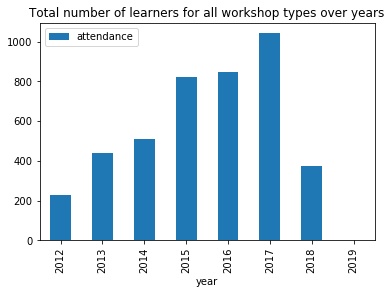

In [105]:
# How many learners attended workshops have over years?
attendees_per_year = workshops_df.groupby(['year'])["attendance"].sum().fillna(0).astype("int")
print(attendees_per_year)
attendees_per_year.plot(kind='bar', legend=True, title ="Total number of learners for all workshop types over years")

Average workshop attendance: 24

year
2012     228
2013     439
2014     533
2015     821
2016     846
2017    1042
2018     805
2019      24
Name: attendance, dtype: int64


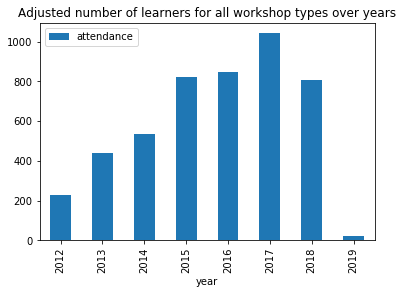

In [106]:
# Adjust these numbers by filling in with average attendance each time we do not have attendance data
# Disregard TTT workshops as they have attendance capped at 20 most of the times
average_attendace = round(workshops_df[workshops_df["workshop_type"] != "TTT"]["attendance"].mean())
print("Average workshop attendance: " + str(average_attendace) + "\n")
# Adjusted attendance over year data and graph
workshops_df["attendance"].fillna(average_attendace, inplace=True)
attendees_per_year = workshops_df.groupby(['year'])["attendance"].sum().astype("int")
print(attendees_per_year)
attendees_per_year.plot(kind='bar', legend=True, title ="Adjusted number of learners for all workshop types over years")

workshop_type   DC  LC  SWC  TTT
year                            
2012             0   0  228    0
2013             0   0  439    0
2014             0   0  533    0
2015            78   0  686   57
2016           144   0  642   60
2017           284  51  624   83
2018           121  25  630   29
2019             0   0   24    0


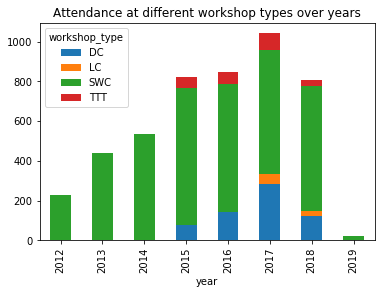

In [107]:
# How many learners attended each of (SWC, DC, LC, TTT) workshops have over years (missing data adjusted by average attendance)?
#average_attendace = round(workshops_df[workshops_df["workshop_type"] != "TTT"]["attendance"].mean())
#workshops_df["attendance"].fillna(average_attendace, inplace=True)
attendees_per_year_per_workshop_type = workshops_df.groupby(['workshop_type', 'year'])['attendance'].sum().unstack("workshop_type").fillna(0).astype("int")
print(attendees_per_year_per_workshop_type)
attendees_per_year_per_workshop_type.plot(kind='bar', stacked=True, title="Attendance at different workshop types over years")


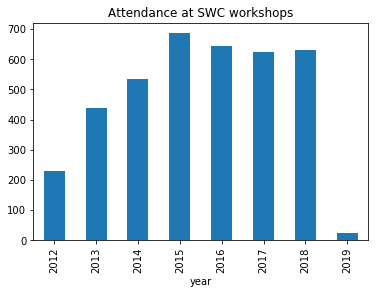

In [108]:
# Attendance just for SWC workshops over years
attendees_per_year_per_workshop_type["SWC"].plot(kind='bar', title="Attendance at SWC workshops")

workshop_type
DC      627
LC       76
SWC    3806
TTT     229
Name: attendance, dtype: int64


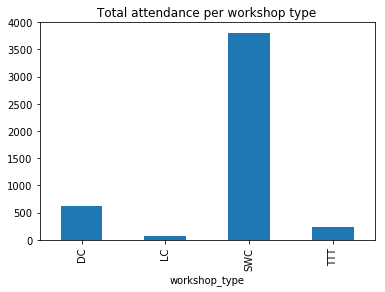

In [109]:
# Total attendance for different workshop types (with missing data adjusted with average attendance)
total_attendance = workshops_df.groupby(['workshop_type'])['attendance'].sum().astype("int")
print(total_attendance)
total_attendance.plot(kind="bar", title="Total attendance per workshop type")

In [145]:
# Save all analyses into an Excel spreadsheet
ANALYSES_DIR = "data/analyses"
if not os.path.exists(ANALYSES_DIR):
    os.makedirs(ANALYSES_DIR)

workshops_file_name = os.path.basename(workshops_file)
workshops_file_name_without_extension = re.sub('\.csv$', '', workshops_file_name.strip())
workshop_analyses_excel_file = ANALYSES_DIR + "/analysed_" + workshops_file_name_without_extension + '.xlsx'

excel_writer = pd.ExcelWriter(workshop_analyses_excel_file, engine='xlsxwriter')

workshops_df.to_excel(excel_writer, sheet_name="carpentry_workshops", index=False)

workshops_per_year.to_excel(excel_writer, sheet_name='total_workshops_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['total_workshops_per_year']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['total_workshops_per_year', 1, 0, len(workshops_per_year.index), 0],
        'values': ['total_workshops_per_year', 1, 1, len(workshops_per_year.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Total number of workshops per year'})
worksheet.insert_chart('F2', chart)
    
workshops_per_host.to_excel(excel_writer, sheet_name='workshops_per_host', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_host']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_host', 1, 0, len(workshops_per_host.index), 0],
        'values': ['workshops_per_host', 1, 1, len(workshops_per_host.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Host institution'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops per host'})
worksheet.insert_chart('F2', chart)

workshop_types_per_year.to_excel(excel_writer, sheet_name='workshops_per_year', index=True)
# workbook = excel_writer.book
# worksheet = excel_writer.sheets['workshops_per_year']
# chart = workbook.add_chart({'type': 'bar', 'subtype': 'stacked'})
# chart.add_series({
#         'categories': ['workshops_per_year', 1, 0, len(workshop_types_per_year.index), 0],
#         'values': ['workshops_per_year', 1, 1, len(workshop_types_per_year.index), 1],
#         'gap': 2,
#     })
# chart.set_y_axis({'major_gridlines': {'visible': False}})
# chart.set_legend({'position': 'none'})
# chart.set_x_axis({'name': 'Year'})
# chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
# chart.set_title({'name': 'Number of workshops per year'})
# worksheet.insert_chart('F2', chart)

total_attendance.to_excel(excel_writer, sheet_name='adjusted_total_attendance', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['adjusted_total_attendance']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['adjusted_total_attendance', 1, 0, len(total_attendance.index), 0],
        'values': ['adjusted_total_attendance', 1, 1, len(total_attendance.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Workshop type'})
chart.set_y_axis({'name': 'Number of attendees', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Adjusted number of attendees'})
worksheet.insert_chart('F2', chart)

attendees_per_year_per_workshop_type.to_excel(excel_writer, sheet_name='adjusted_attendance_per_year', index=True)
# workbook = excel_writer.book
# worksheet = excel_writer.sheets['adjusted_attendance_per_year']

excel_writer.save()